<a href="https://colab.research.google.com/github/Bisalia/Bayesian_network/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22churn_prediction_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
len(df)


7043

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [ ]:
from pandas.core.arrays import string_
df.columns = df.columns.str.lower().str.replace(' ',  '_')
string_columns= list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns :
  df[col] =df[col].str.lower().replace(' ', '_')

In [ ]:
df.churn = (df.churn =='yes').astype(int)

In [ ]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train_full, df_test = train_test_split(df, train_size=0.2, random_state=1)

In [ ]:
# for validetion
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)


In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [ ]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_train_full.churn.value_counts()

0    1028
1     380
Name: churn, dtype: int64

In [ ]:
global_mean = df_train_full.churn.mean()


In [ ]:
round(global_mean, 3)

0.27

In [ ]:

categorical = ['gender', 'seniorcitizen', 'partner','dependents','phoneservice', 'multiplelines','internetservice','onlinesecurity', 'onlinebackup','deviceprotection','techsupport',
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [ ]:
# feature important
df_train_full.groupby(['gender', 'churn'])['churn'].count()

gender  churn
female  0        497
        1        200
male    0        531
        1        180
Name: churn, dtype: int64

<Axes: xlabel='gender', ylabel='churn'>

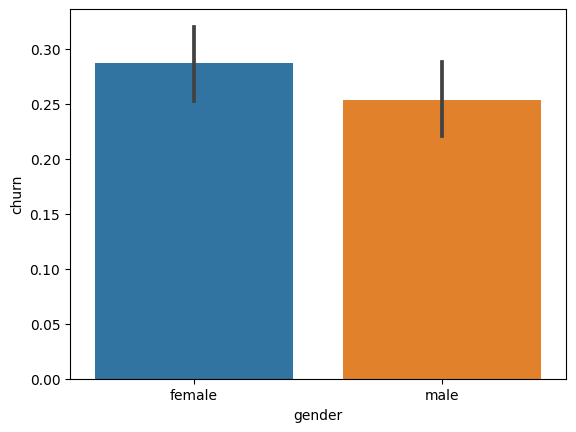

In [ ]:
sns.barplot(x='gender', y ='churn', data =df_train_full)

In [ ]:
female_mean= df_train_full[df_train_full.gender=='female'].churn.mean()
female_mean

0.28694404591104733

In [ ]:
male_mean = df_train_full[df_train_full.gender=='male'].churn.mean()
male_mean

0.25316455696202533

In [ ]:
df_train_full.groupby(['partner', 'churn'])['churn'].count()

partner  churn
no       0        509
         1        244
yes      0        519
         1        136
Name: churn, dtype: int64

<Axes: xlabel='partner', ylabel='churn'>

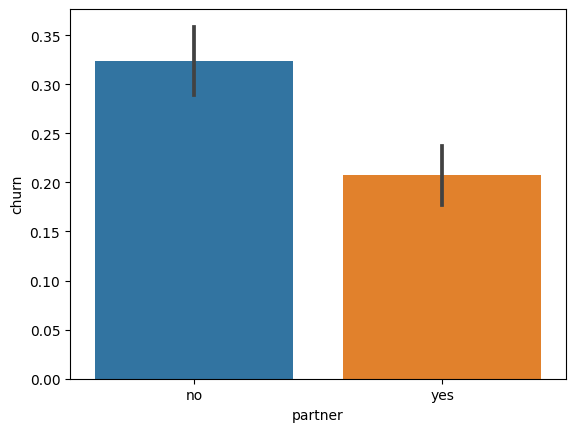

In [ ]:
sns.barplot(x='partner', y='churn', data=df_train_full)

#Risk Ratio

In [ ]:
partner_yes= df_train_full[df_train_full.partner =='yes'].churn.mean()
print(f'partner_yes=={partner_yes}')
partner_no= df_train_full[df_train_full.partner =='no'].churn.mean()
print(f'partner_no=={partner_no}')

partner_yes==0.20763358778625954
partner_no==0.3240371845949535


In [ ]:
risk =female_mean/global_mean
risk

1.0632032016914594

In [ ]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff']=df_group['mean'] - global_mean
df_group['risk'] = df_group['mean']/global_mean
df_group

,mean,diff,risk
gender,,,
female,0.286944,0.017058,1.063203
male,0.253165,-0.016722,0.938041


In [ ]:
from IPython.display import display
for col in categorical:
  df_group = df_train_full.groupby(by=col).churn.agg(['mean']) #
  df_group['diff'] = df_group['mean'] - global_mean
  df_group['rate'] = df_group['mean'] / global_mean
  display(df_group)


,mean,diff,rate
gender,,,
female,0.286944,0.017058,1.063203
male,0.253165,-0.016722,0.938041


,mean,diff,rate
seniorcitizen,,,
0,0.235544,-0.034342,0.872753
1,0.443966,0.174079,1.645009


,mean,diff,rate
partner,,,
no,0.324037,0.054151,1.200643
yes,0.207634,-0.062253,0.769337


,mean,diff,rate
dependents,,,
no,0.307463,0.037576,1.139230
yes,0.176179,-0.093708,0.652788


,mean,diff,rate
phoneservice,,,
no,0.244094,-0.025792,0.904434
yes,0.272443,0.002557,1.009475


,mean,diff,rate
multiplelines,,,
no,0.248164,-0.021722,0.919515
no phone service,0.244094,-0.025792,0.904434
yes,0.300000,0.030114,1.111579


,mean,diff,rate
internetservice,,,
dsl,0.208421,-0.061465,0.772255
fiber optic,0.425987,0.156100,1.578393
no,0.067692,-0.202194,0.250818


,mean,diff,rate
onlinesecurity,,,
no,0.417266,0.147380,1.546081
no internet service,0.067692,-0.202194,0.250818
yes,0.175258,-0.094629,0.649376


,mean,diff,rate
onlinebackup,,,
no,0.401327,0.131440,1.487021
no internet service,0.067692,-0.202194,0.250818
yes,0.241667,-0.028220,0.895439


,mean,diff,rate
deviceprotection,,,
no,0.410084,0.140198,1.519469
no internet service,0.067692,-0.202194,0.250818
yes,0.233607,-0.036280,0.865574


,mean,diff,rate
techsupport,,,
no,0.420520,0.150634,1.558138
no internet service,0.067692,-0.202194,0.250818
yes,0.171355,-0.098531,0.634917


,mean,diff,rate
streamingtv,,,
no,0.351103,0.081217,1.300929
no internet service,0.067692,-0.202194,0.250818
yes,0.309833,0.039947,1.148013


,mean,diff,rate
streamingmovies,,,
no,0.356870,0.086984,1.322298
no internet service,0.067692,-0.202194,0.250818
yes,0.305903,0.036017,1.133453


,mean,diff,rate
contract,,,
month-to-month,0.428202,0.158315,1.586600
one year,0.133562,-0.136325,0.494881
two year,0.029155,-0.240732,0.108025


,mean,diff,rate
paperlessbilling,,,
no,0.177215,-0.092671,0.656629
yes,0.329825,0.059938,1.222087


,mean,diff,rate
paymentmethod,,,
bank transfer (automatic),0.158416,-0.111471,0.586972
credit card (automatic),0.147239,-0.122647,0.545560
electronic check,0.469008,0.199122,1.737799
mailed check,0.193220,-0.076666,0.715932


#Mutual information


In [ ]:
from sklearn.metrics import mutual_info_score

# create a stand-alone function for calculating mutual information.
def calculate_mi(series):
  #use the mutual_info_score function  from sckit_learn
  return mutual_info_score(series, df_train_full.churn)
#Apply the function from(A) tio each categorical columun of the dataset
df_mi = df_train_full[categorical].apply(calculate_mi)
#Sort values result
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.094655
techsupport,0.064363
onlinesecurity,0.062735
internetservice,0.058743
paymentmethod,0.051889
deviceprotection,0.051538
onlinebackup,0.049009
streamingmovies,0.039013
streamingtv,0.038626
paperlessbilling,0.014646


#Correlation coefficient


In [ ]:
# Person'scorrelation
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.336493
monthlycharges    0.214517
totalcharges     -0.162787
dtype: float64

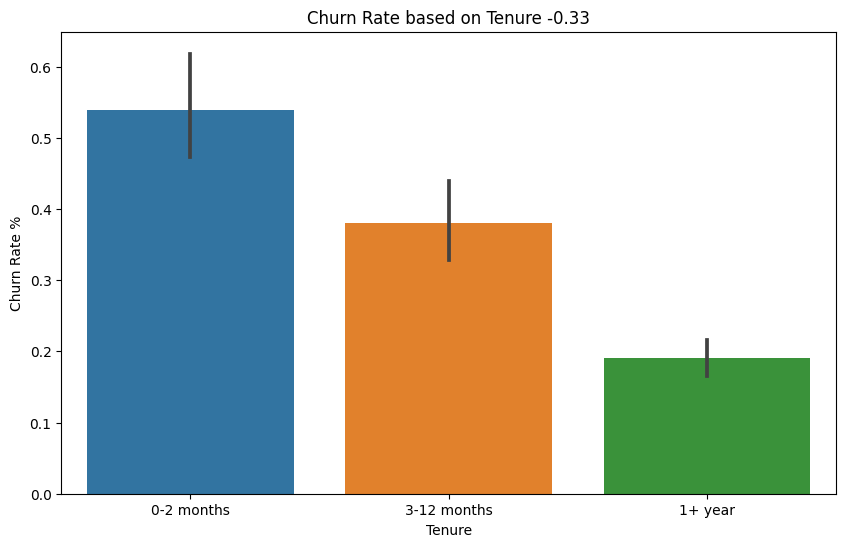

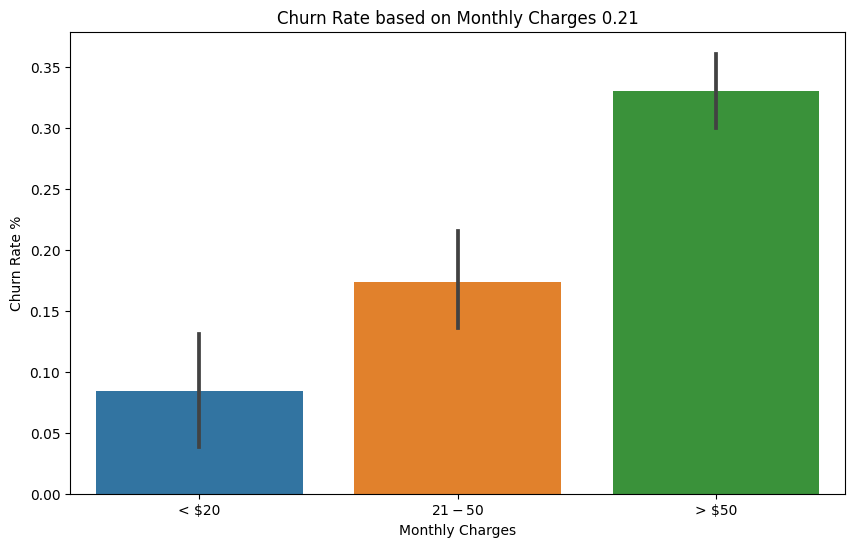

In [ ]:



# Create bins for tenure
tenure_bins = [0, 2, 12, float('inf')]
tenure_labels = ['0-2 months', '3-12 months', '1+ year']

# Add a new column to the dataframe with tenure bins
df_train_full['tenure_bins'] = pd.cut(df_train_full['tenure'], bins=tenure_bins, labels=tenure_labels)

# Plot the churn rate for each tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x='tenure_bins', y='churn', data=df_train_full, order=tenure_labels)
plt.xlabel('Tenure')
plt.ylabel('Churn Rate %')
plt.title('Churn Rate based on Tenure -0.33')
plt.show()

# Create bins for monthly charges
charges_bins = [0, 20, 50, float('inf')]
charges_labels = ['< $20', '$21-$50', '> $50']

# Add a new column to the dataframe with charges bins
df_train_full['charges_bins'] = pd.cut(df_train_full['monthlycharges'], bins=charges_bins, labels=charges_labels)

# Plot the churn rate for each charges bin
plt.figure(figsize=(10, 6))
sns.barplot(x='charges_bins', y='churn', data=df_train_full, order=charges_labels)
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate %')
plt.title('Churn Rate based on Monthly Charges 0.21')
plt.show()






# feature engineering

In [ ]:
#One-hot encoding for categorical variable
train_dict = df_train[categorical + numerical]. to_dict(orient='row')

<ipython-input-98-b03969e3450e>:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict = df_train[categorical + numerical]. to_dict(orient='row')


In [ ]:
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'no',
  'contract': 'one year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic check',
  'tenure': 56,
  'monthlycharges': 93.15,
  'totalcharges': 5253.95},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no internet service',
  'onlinebackup': 'no internet service',
  'deviceprotection': 'no internet service',
  'techsupport': 'no internet service',
  'streamingtv': 'no internet service',
  'streamingmovies': 'no internet service',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed check',


In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
# we can use it for converting the dictionaries to a matrix
X_train = dv.transform(train_dict)
X_train[0]

array([0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 9.31500e+01, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 5.60000e+01, 5.25395e+03])

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one year',
       'contract=two year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no internet service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no phone service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no internet service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no internet service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank transfer (automatic)',
       'paymentmethod=credit card (automatic)',
       'paymentmethod=electronic check', 'paymentmethod=mailed check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no internet service',

#Logical regression Model $ g(x_i)= sigmoid(w_0 + x_i^T)$
# $sigmoid(x)= 1/(1+exp(-x))$
# $g(x_i)  = sigmoid(w_0 + x_iw_1 + x_2w_2 +...+x_nw_n )$
## $$\displaystyle \left(g(x_i)= sigmoid(\sum_{j =1}^nw_jx_ij)\right)$$

In [ ]:
# logical regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
val_dict = df_val[categorical+ numerical].to_dict(orient='rows')
X_val = dv.transform(val_dict)

<ipython-input-104-ffaa3be62193>:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  val_dict = df_val[categorical+ numerical].to_dict(orient='rows')


In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([4.32752776e-03, 9.27859982e-04, 3.39899132e-02, 5.02717508e-01,
       1.42133434e-02, 7.89078423e-01, 1.72908487e-01, 1.50009607e-02,
       6.70240679e-01, 1.29553215e-01, 2.55145303e-01, 3.44641182e-01,
       3.41109616e-01, 6.91881764e-01, 2.06033384e-01, 4.85025276e-01,
       1.74881416e-02, 1.42496992e-03, 1.66940428e-02, 4.42732439e-01,
       6.66748090e-01, 4.50919619e-01, 6.67843880e-03, 8.57899156e-04,
       4.53507801e-01, 3.55520841e-01, 3.87967006e-02, 5.25356449e-01,
       2.96619938e-01, 6.82949312e-01, 7.42864248e-01, 1.80987197e-02,
       7.32238874e-01, 1.02340831e-01, 4.92833752e-01, 5.06428747e-01,
       2.31146092e-04, 2.33290500e-01, 2.85605969e-01, 2.02228151e-01,
       4.00240383e-01, 1.97494356e-02, 7.46554342e-02, 5.54729871e-02,
       8.11649532e-03, 1.53385744e-01, 2.84224004e-01, 2.07583831e-01,
       3.14845444e-02, 2.40187810e-01, 5.43557436e-01, 7.94815458e-01,
       5.22158140e-01, 3.16038921e-01, 4.59772100e-01, 8.33981085e-01,
      

In [ ]:
churn = y_pred >=0.5


In [ ]:
#(y_val == churn).mean()



# model interpretation

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'contract=month-to-month': 0.613,
 'contract=one year': -0.012,
 'contract=two year': -0.735,
 'dependents=no': -0.224,
 'dependents=yes': 0.089,
 'deviceprotection=no': 0.121,
 'deviceprotection=no internet service': -0.112,
 'deviceprotection=yes': -0.143,
 'gender=female': 0.043,
 'gender=male': -0.177,
 'internetservice=dsl': -0.248,
 'internetservice=fiber optic': 0.226,
 'internetservice=no': -0.112,
 'monthlycharges': 0.0,
 'multiplelines=no': -0.3,
 'multiplelines=no phone service': 0.109,
 'multiplelines=yes': 0.056,
 'onlinebackup=no': 0.099,
 'onlinebackup=no internet service': -0.112,
 'onlinebackup=yes': -0.122,
 'onlinesecurity=no': 0.093,
 'onlinesecurity=no internet service': -0.112,
 'onlinesecurity=yes': -0.115,
 'paperlessbilling=no': -0.197,
 'paperlessbilling=yes': 0.063,
 'partner=no': 0.038,
 'partner=yes': -0.173,
 'paymentmethod=bank transfer (automatic)': -0.376,
 'paymentmethod=credit card (automatic)': -0.269,
 'paymentmethod=electronic check': 0.507,
 'pay

In [ ]:
small_subset= ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='rows')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)
X_small_train = dv_small.transform(train_dict_small)

<ipython-input-110-97ce487be827>:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_dict_small = df_train[small_subset].to_dict(orient='rows')


In [ ]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one year',
       'contract=two year', 'tenure', 'totalcharges'], dtype=object)

In [ ]:

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
model_small.intercept_[0]

-0.6024847352890528

In [ ]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.826,
 'contract=one year': -0.167,
 'contract=two year': -1.262,
 'tenure': -0.112,
 'totalcharges': 0.001}

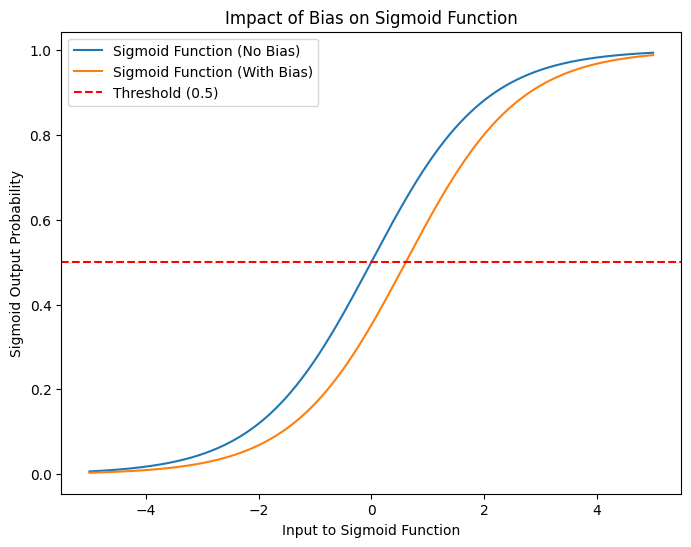

In [ ]:


# Bias term
bias = -0.613

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Values for x (representing different scenarios)
x_values = np.linspace(-5, 5, 1000)

# Calculate sigmoid values without bias
sigmoid_values_no_bias = sigmoid(x_values)

# Calculate sigmoid values with bias
sigmoid_values_with_bias = sigmoid(x_values + bias)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, sigmoid_values_no_bias, label='Sigmoid Function (No Bias)')
plt.plot(x_values, sigmoid_values_with_bias, label='Sigmoid Function (With Bias)')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.title('Impact of Bias on Sigmoid Function')
plt.xlabel('Input to Sigmoid Function')
plt.ylabel('Sigmoid Output Probability')
plt.legend()
plt.show()


In [ ]:
# scoring
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,}

In [ ]:
X_test = dv.transform([customer])

In [ ]:
X_test

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [ ]:
model.predict_proba(X_test)

array([[0.92551594, 0.07448406]])

In [ ]:
model.predict_proba(X_test)[0, 1]

0.07448405639626363

In [ ]:
customer = {
'gender': 'female',
'seniorcitizen': 1,
'partner': 'no',
'dependents': 'no',
'phoneservice': 'yes',
'multiplelines': 'yes',
'internetservice': 'fiber_optic',
'onlinesecurity': 'no',
'onlinebackup': 'no',
'deviceprotection': 'no',
'techsupport': 'no',
'streamingtv': 'yes',
'streamingmovies': 'no',
'contract': 'month-to-month',
'paperlessbilling': 'yes',
'paymentmethod': 'electronic_check',
'tenure': 1,
'monthlycharges': 85.7,
'totalcharges': 85.7
}

In [ ]:
X_test = dv.transform([customer])

In [ ]:
model.predict_proba(X_test)[0, 1]

0.7206398565743126